In [3]:
# Etapa 1: Importação e leitura inicial
import pandas as pd

df = pd.read_csv("dataset_blockchains_pub.csv")
print("📊 Informações antes da limpeza:")
print(df.info())
print("\nPrimeiras linhas:")
print(df.head())


📊 Informações antes da limpeza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blockchain    2000 non-null   object 
 1   block_number  2000 non-null   int64  
 2   block_size    1000 non-null   float64
 3   gas_used      1000 non-null   float64
 4   tx_count      2000 non-null   int64  
 5   cpu_cost      0 non-null      float64
 6   timestamp     2000 non-null   object 
 7   tx_por_kb     1000 non-null   float64
 8   dia_semana    2000 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 140.8+ KB
None

Primeiras linhas:
  blockchain  block_number  block_size  gas_used  tx_count  cpu_cost  \
0    bitcoin        903287    392105.0       NaN       872       NaN   
1    bitcoin        903286    261758.0       NaN       302       NaN   
2    bitcoin        903285    689027.0       NaN      1101       NaN   
3    bitcoin 

In [4]:
# Etapa 2: Remoção da coluna 'cpu_cost' (está vazia)
df.drop(columns=["cpu_cost"], inplace=True)

In [5]:
# Etapa 3: Conversão da coluna 'timestamp' para datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [7]:
# Etapa 4: Verificação de valores ausentes
print("\n🔍 Valores ausentes por coluna:")
print(df.isnull().sum())


🔍 Valores ausentes por coluna:
blockchain         0
block_number       0
block_size      1000
gas_used        1000
tx_count           0
timestamp          0
tx_por_kb       1000
dia_semana         0
dtype: int64


In [8]:
# Etapa 5: Separação dos dados por blockchain
df_bitcoin = df[df["blockchain"] == "bitcoin"].copy()
df_ethereum = df[df["blockchain"] == "ethereum"].copy()

In [14]:
# Recalcular a coluna tx_por_kb para blocos que tenham os dados necessários
df["tx_por_kb_calc"] = df["tx_count"] / (df["block_size"] / 1024)

# Análise Unificada
print("\n📊 Estatísticas unificadas (com tx_por_kb recalculado):")
print(df[["tx_count", "block_size", "gas_used", "tx_por_kb_calc"]].describe())

# Duração do dataset
print("\n⏱️ Intervalo de tempo da amostra:")
print("Início:", df['timestamp'].min())
print("Fim:", df['timestamp'].max())

# Verificando distribuição por dia da semana
print("\n📅 Distribuição de blocos por dia da semana:")
print(df['dia_semana'].value_counts())


📊 Estatísticas unificadas (com tx_por_kb recalculado):
          tx_count   block_size      gas_used  tx_por_kb_calc
count  2000.000000     1000.000  1.000000e+03     1000.000000
mean   1446.509000  1524029.908  1.823283e+07        1.832461
std    1523.986584   375627.287  8.095113e+06        0.675440
min       1.000000      382.000  9.843960e+05        0.018332
25%     168.000000  1449409.000  1.302098e+07        1.476706
50%     327.500000  1589694.500  1.658653e+07        1.914448
75%    2926.000000  1700068.250  2.210990e+07        2.313294
max    5437.000000  3325299.000  3.606988e+07        4.309635

⏱️ Intervalo de tempo da amostra:
Início: 2025-06-22 09:56:03
Fim: 2025-06-29 22:10:23

📅 Distribuição de blocos por dia da semana:
dia_semana
Sunday       1216
Thursday      157
Saturday      145
Wednesday     143
Tuesday       117
Friday        115
Monday        107
Name: count, dtype: int64


In [15]:
#Início das visualizações

import matplotlib.pyplot as plt

if "tx_por_kb_calc" in df.columns:
    df["tx_por_kb"] = df["tx_por_kb_calc"]
    df.drop(columns=["tx_por_kb_calc"], inplace=True)


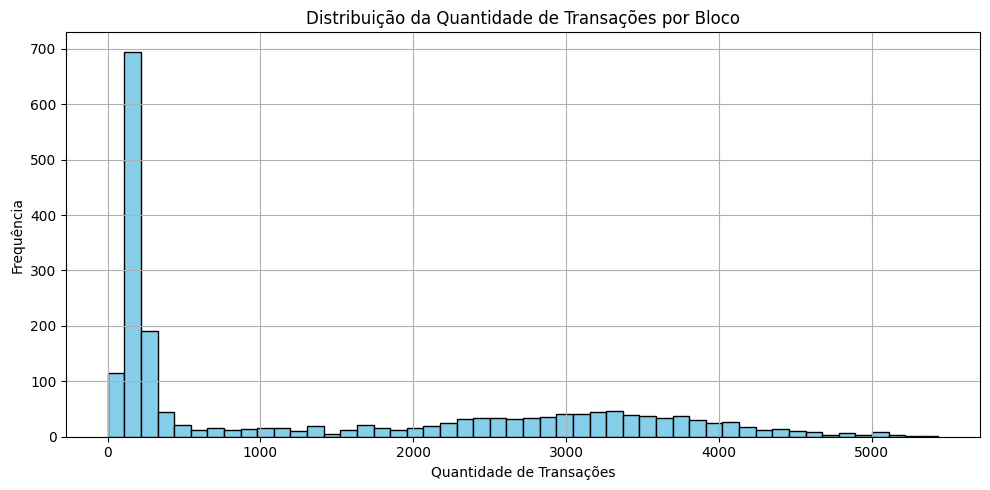

In [16]:
# Gráfico 1 – Distribuição de Transações por Bloco
plt.figure(figsize=(10, 5))
df["tx_count"].hist(bins=50, color="skyblue", edgecolor="black")
plt.title("Distribuição da Quantidade de Transações por Bloco")
plt.xlabel("Quantidade de Transações")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()


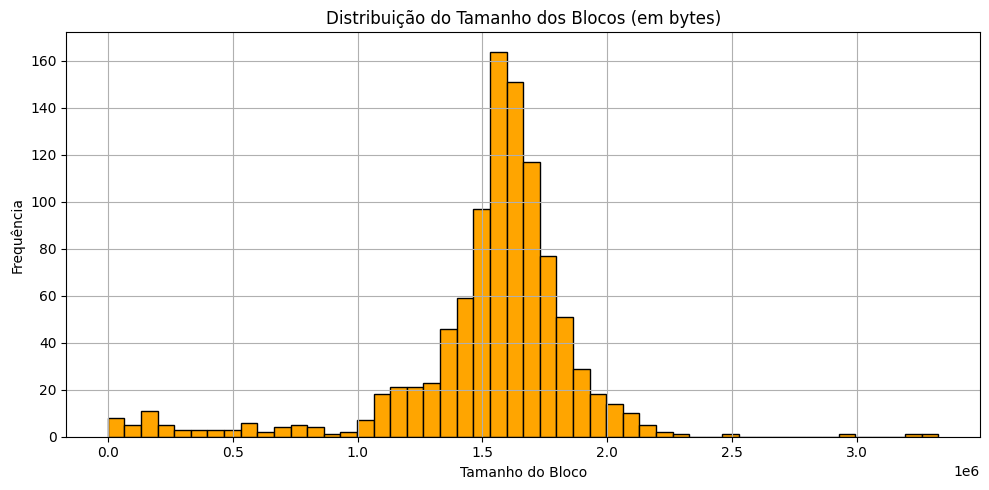

In [17]:
# Gráfico 2 – Distribuição do Tamanho dos Blocos
plt.figure(figsize=(10, 5))
df["block_size"].dropna().hist(bins=50, color="orange", edgecolor="black")
plt.title("Distribuição do Tamanho dos Blocos (em bytes)")
plt.xlabel("Tamanho do Bloco")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()


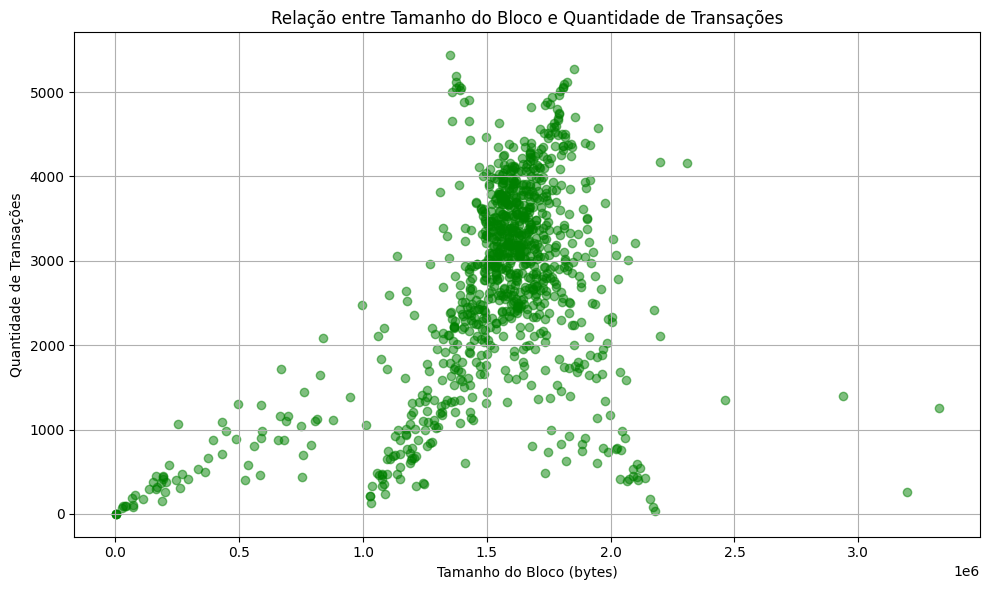

In [18]:
# Gráfico 3 – Relação entre Tamanho do Bloco e Transações
plt.figure(figsize=(10, 6))
plt.scatter(df["block_size"], df["tx_count"], alpha=0.5, color="green")
plt.title("Relação entre Tamanho do Bloco e Quantidade de Transações")
plt.xlabel("Tamanho do Bloco (bytes)")
plt.ylabel("Quantidade de Transações")
plt.grid(True)
plt.tight_layout()
plt.show()


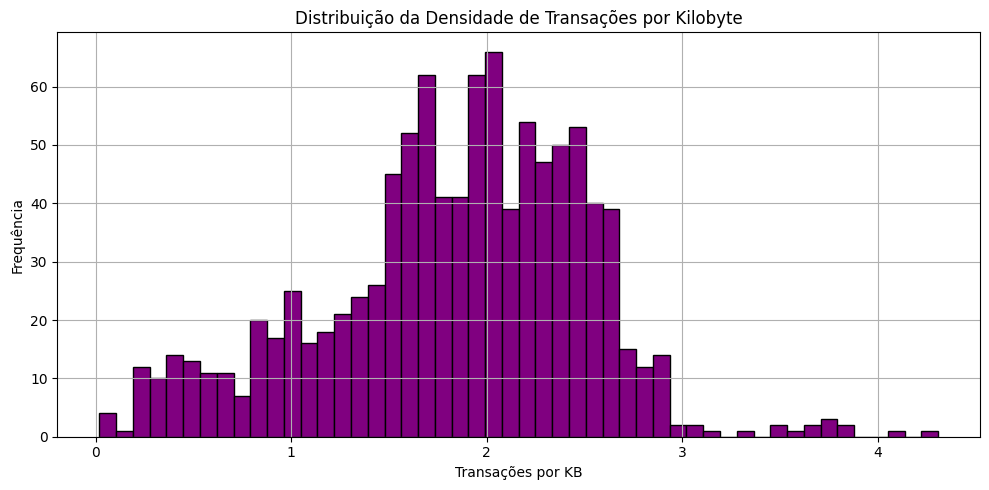

In [19]:
# Gráfico 4 – Densidade de Transações por Kilobyte
plt.figure(figsize=(10, 5))
df["tx_por_kb"].dropna().hist(bins=50, color="purple", edgecolor="black")
plt.title("Distribuição da Densidade de Transações por Kilobyte")
plt.xlabel("Transações por KB")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()

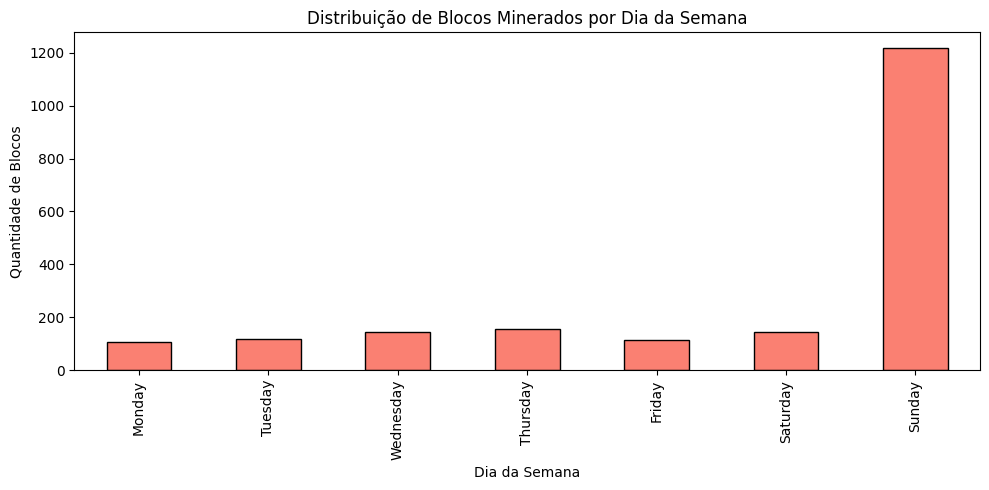

In [20]:
# Gráfico 5 – Blocos por Dia da Semana
plt.figure(figsize=(10, 5))
df["dia_semana"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
], fill_value=0).plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Distribuição de Blocos Minerados por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Quantidade de Blocos")
plt.tight_layout()
plt.show()

In [21]:
# Exportar o dataset final para CSV
df.to_csv("dataset_blockchains_final.csv", index=False)
print("✅ Dataset final exportado como 'dataset_blockchains_final.csv'")

✅ Dataset final exportado como 'dataset_blockchains_final.csv'
